# Tahapan terdiri antara lain:

1. Ubah dataset ke dalam dataframe.

2. Hapus kolom 'Id' pada dataframe serta pisahkan antara atribut dan label.

3. Bagi dataset menjadi data latih dan data uji.

4. Buat dan latih model Decision Tree.

5. Lakukan pengujian model dengan menggunakan data uji.

6. Lakukan prediksi dengan model yang telah dilatih.

7. Visualisasi model Decision Tree yang telah dilatih.



In [1]:
import re
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
# Loading the dataset into a pandas dataframe
data_insurance = pd.read_csv('Prediction Insurance.csv')
pd.concat([data_insurance.head(), data_insurance.tail()])

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0
381104,381105,Male,74,1,26,1,1-2 Year,No,30170,26,88,0
381105,381106,Male,30,1,37,1,< 1 Year,No,40016,152,131,0
381106,381107,Male,21,1,30,1,< 1 Year,No,35118,160,161,0
381107,381108,Female,68,1,14,0,> 2 Years,Yes,44617,124,74,0
381108,381109,Male,46,1,29,0,1-2 Year,No,41777,26,237,0


In [24]:
# check data is nul
data_insurance.isnull().any()

id                      False
Gender                  False
Age                     False
Driving_License         False
Region_Code             False
Previously_Insured      False
Vehicle_Age             False
Vehicle_Damage          False
Annual_Premium          False
Policy_Sales_Channel    False
Vintage                 False
Response                False
dtype: bool

In [25]:
# Printing the shape of the dataframe
print('Number of rows', data_insurance.shape[0])
print('Number of columns', data_insurance.shape[1])

# chek count Target colums name Response
data_insurance['Response'].value_counts()

Number of rows 381109
Number of columns 12


Response
0    334399
1     46710
Name: count, dtype: int64

In [26]:
# Renaming the 'Response' column to 'pay_policy'
data_insurance.rename(columns={'Response': 'pay_policy'}, inplace=True)
data_insurance['pay_policy'].value_counts()

#Let's get the data types of the different features
data_insurance.dtypes

id                       int64
Gender                  object
Age                      int64
Driving_License          int64
Region_Code              int64
Previously_Insured       int64
Vehicle_Age             object
Vehicle_Damage          object
Annual_Premium           int64
Policy_Sales_Channel     int64
Vintage                  int64
pay_policy               int64
dtype: object

<Axes: xlabel='pay_policy', ylabel='count'>

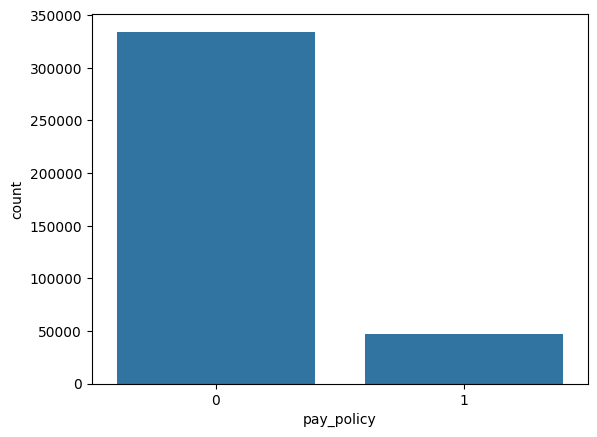

In [27]:
# check for the total number of those who pay_policy and those who did not_pay_policy:
sns.countplot(x='pay_policy', data=data_insurance)

<Axes: xlabel='pay_policy', ylabel='count'>

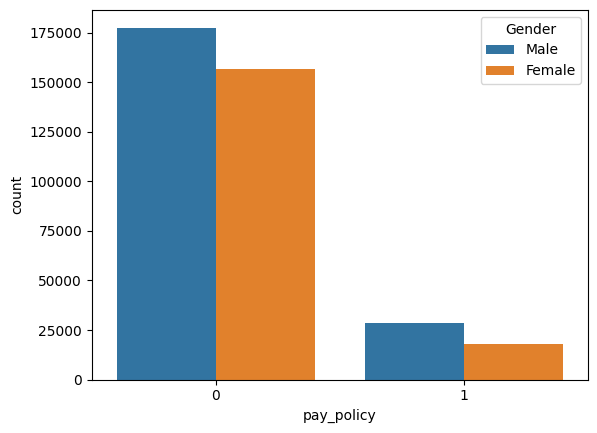

In [28]:
# Check for how many males and females pay_policy insurance:
sns.countplot(x='pay_policy', hue='Gender', data=data_insurance)

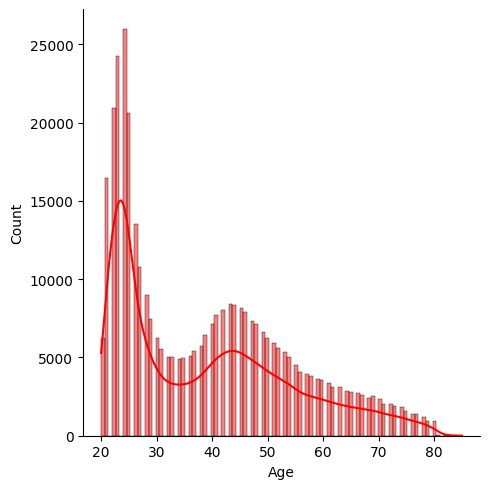

In [29]:
# check Age pay_policy insurance
sns.displot(x='Age', data=data_insurance, color='red', kde=True)

In [30]:
# menghilangkan kolom yang tidak penting
data_insurance.drop('id',axis=1,inplace=True)

In [31]:
data_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Gender                381109 non-null  object
 1   Age                   381109 non-null  int64 
 2   Driving_License       381109 non-null  int64 
 3   Region_Code           381109 non-null  int64 
 4   Previously_Insured    381109 non-null  int64 
 5   Vehicle_Age           381109 non-null  object
 6   Vehicle_Damage        381109 non-null  object
 7   Annual_Premium        381109 non-null  int64 
 8   Policy_Sales_Channel  381109 non-null  int64 
 9   Vintage               381109 non-null  int64 
 10  pay_policy            381109 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 32.0+ MB


In [32]:
#Change Gender to dummy variable and drop the first dummy to prevent multicollinearity:
gender = pd.get_dummies(data_insurance['Gender'], drop_first=True)

In [33]:
# When the Male value is 1, it means the gender is male, and when the value is 0, the gender is female.
# We did not require both the Female and Gender variables in the dataset, as one can be used to predict the other.
data_insurance.drop('Gender',axis=1,inplace=True)
data_insurance = pd.concat([data_insurance,gender], axis=1)

In [34]:
data_insurance.head(10)

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,pay_policy,Male
0,44,1,28,0,> 2 Years,Yes,40454,26,217,1,True
1,76,1,3,0,1-2 Year,No,33536,26,183,0,True
2,47,1,28,0,> 2 Years,Yes,38294,26,27,1,True
3,21,1,11,1,< 1 Year,No,28619,152,203,0,True
4,29,1,41,1,< 1 Year,No,27496,152,39,0,False
5,24,1,33,0,< 1 Year,Yes,2630,160,176,0,False
6,23,1,11,0,< 1 Year,Yes,23367,152,249,0,True
7,56,1,28,0,1-2 Year,Yes,32031,26,72,1,False
8,24,1,3,1,< 1 Year,No,27619,152,28,0,False
9,32,1,6,1,< 1 Year,No,28771,152,80,0,False


In [36]:
#Split the data into independent and dependent variables.
X = data_insurance.iloc[:,[0,6,10]] # Age, Annual_Premium and
X.head()

,Age,Annual_Premium,Male
0,44,40454,True
1,76,33536,True
2,47,38294,True
3,21,28619,True
4,29,27496,False


In [37]:
y = data_insurance.iloc[:, 9] # pay_policy
y.head()

0    1
1    0
2    1
3    0
4    0
Name: pay_policy, dtype: int64

#Transform the Numerical Variables: Scaling

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 0.33377727,  0.57453868,  0.92154476],
       [ 2.39675074,  0.17263624,  0.92154476],
       [ 0.52718104,  0.4490531 ,  0.92154476],
       ...,
       [-1.14898491,  0.26454281,  0.92154476],
       [ 1.88100737,  0.81638891, -1.08513449],
       [ 0.46271311,  0.6513986 ,  0.92154476]])

#Sebelum melatih model kita perlu memisahkan atribut dengan label. Selain itu, kita juga perlu membagi dataset menjadi data latih dan data uji.

In [39]:
#Split the dataset into training and testing sets using the train_test_split function.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(266776, 3)
(114333, 3)
(266776,)
(114333,)


#Fitting the logistic regression model and predicting test results



In [40]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [41]:
#Predict and get Accuray for the Test data
y_pred = classifier.predict(X_test)

#Let's create a Pandas DataFrame and compare the predicted and actual values
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
64142,0,0
166265,0,0
370956,1,0
101977,0,0
105780,1,0
...,...,...
274131,0,0
250892,0,0
312975,0,0
209967,0,0


In [42]:
print(classifier.coef_)

[[0.30121501 0.04795342 0.12008089]]


In [43]:
print(classifier.intercept_)

[-2.00823221]


In [44]:
#evaluate model use predict_proba
print(classifier.predict_proba(X))

[[0.8543933  0.1456067 ]
 [0.76266686 0.23733314]
 [0.84777348 0.15222652]
 ...
 [0.90299707 0.09700293]
 [0.82241559 0.17758441]
 [0.84902308 0.15097692]]


#Using confusion matrix From the Scikit-learn metrics module, we import confusion_matrix. The confusion matrix is the number of correct and incorrect predictions column-wise, showing the following values:




Text(0.5, 23.52222222222222, 'Predicted label')

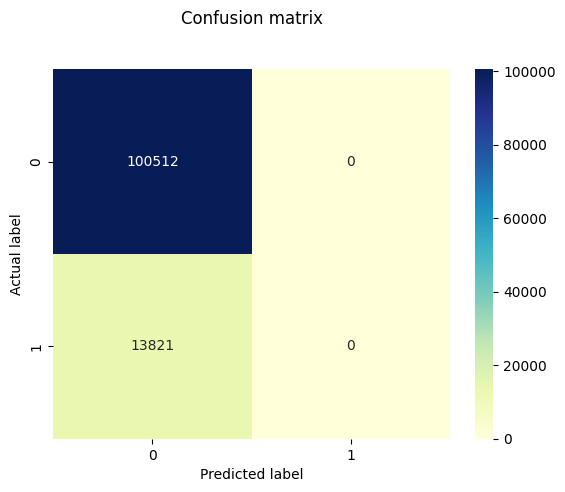

In [46]:
#Making the Confusion Matrix
#True negatives(TN) in the upper-left position.
#False negatives(FN) in the lower-left position.
#False positives(FP) in the upper-right position.
#True positives(TP) in the lower-right position.
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#From the confusion_matrix, we have the following observations:
#100512 TN predictions: zeros predicted correctly.
#13821 FN predictions: ones wrongly predicted as zeros.
#0 FP predictions: zeros that were wrongly predicted as ones.
#0 TP predictions: ones predicted correctly.


In [47]:
# Also same result from sklearn accuracy_score
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)
#0.8791162656450894

0.8791162656450894

In [48]:
#Creating a classification report for the model
target_names = ['will_NOT_pay_police', 'will_pay_policy']
print(classification_report(y_test, y_pred,target_names=target_names))

                     precision    recall  f1-score   support

will_NOT_pay_police       0.88      1.00      0.94    100512
    will_pay_policy       0.00      0.00      0.00     13821

           accuracy                           0.88    114333
          macro avg       0.44      0.50      0.47    114333
       weighted avg       0.77      0.88      0.82    114333



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
# Saving the model
filename = 'check_pay_police_or_not_pay.pkl'
pickle.dump(classifier,open(filename, 'wb'))